**Analysis of output from Exp. 2**

In [19]:
library(ggplot2)
library(tidyr)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



***Reg 4***

MSE Train: 2259.798810884709

MSE Val: 3202.5089784523752

Number of features: 215

Feature selection criteria: Only use features that occur in 800 of 899 documents

In [1]:
train_reg4 <- read.csv("/Volumes/Korpora/Exp2_Reg4_Train_results.csv",sep=";", header=T)
val_reg4 <- read.csv("/Volumes/Korpora/Exp2_Reg4_Val_results.csv",sep=";", header=T)

head(train_reg4)

X,feature,weight,YEAR,weight_value,instance
0,<BIAS>,1769.7249838,0,NA,NA
1,'keine',0.2821587,0,NA,NA
2,'weiter',0.2605753,0,NA,NA
3,'ja',0.2169771,0,NA,NA
4,'that',0.1813768,0,NA,NA
5,'leicht',0.1778723,0,NA,NA


In [2]:
labels_val_reg4 <- read.csv('/Volumes/Korpora/Reg4_Labels_val.csv',sep=';')

In [3]:
labels_train_reg4 <- read.csv('/Volumes/Korpora/Reg4_Labels_train.csv',sep=';')

In [6]:
summary(labels_val_reg4)

       X        Predicted_y   Publication_year   Difference      
 Min.   :  0   Min.   :1483   Min.   :1603     Min.   :-164.438  
 1st Qu.: 56   1st Qu.:1764   1st Qu.:1750     1st Qu.: -35.217  
 Median :112   Median :1785   Median :1804     Median :  -5.314  
 Mean   :112   Mean   :1790   Mean   :1791     Mean   :  -1.664  
 3rd Qu.:168   3rd Qu.:1822   3rd Qu.:1843     3rd Qu.:  28.571  
 Max.   :224   Max.   :2026   Max.   :1913     Max.   : 255.349  

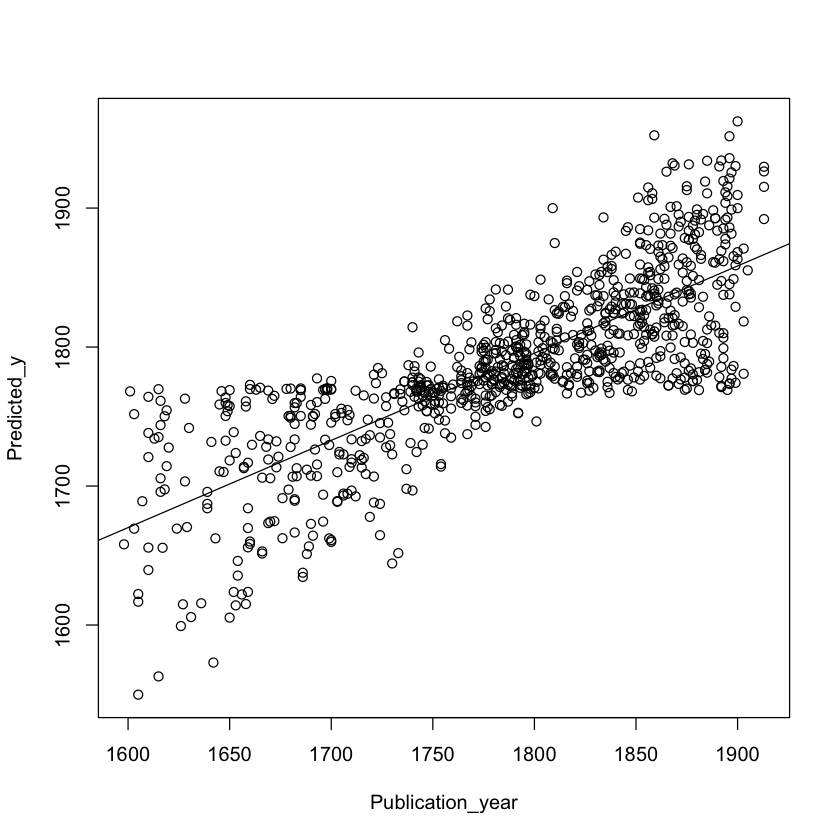

In [7]:
plot(Predicted_y~Publication_year, data=labels_train_reg4)
abline(lm(Predicted_y~Publication_year, data=labels_train_reg4))

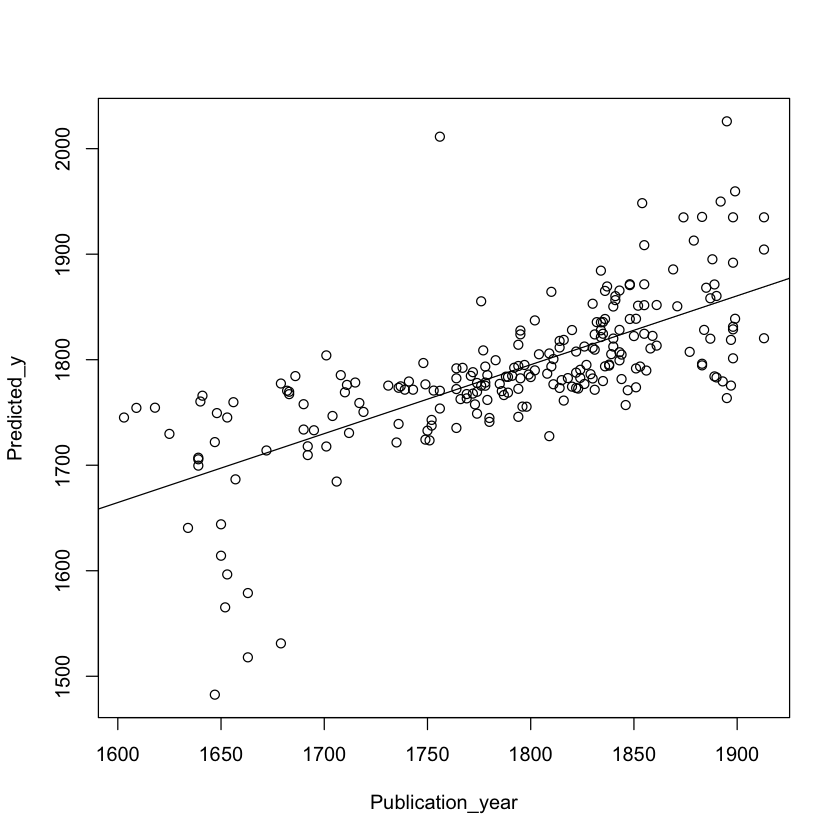

In [8]:
plot(Predicted_y~Publication_year, data=labels_val_reg4)
abline(lm(Predicted_y~Publication_year, data=labels_val_reg4))

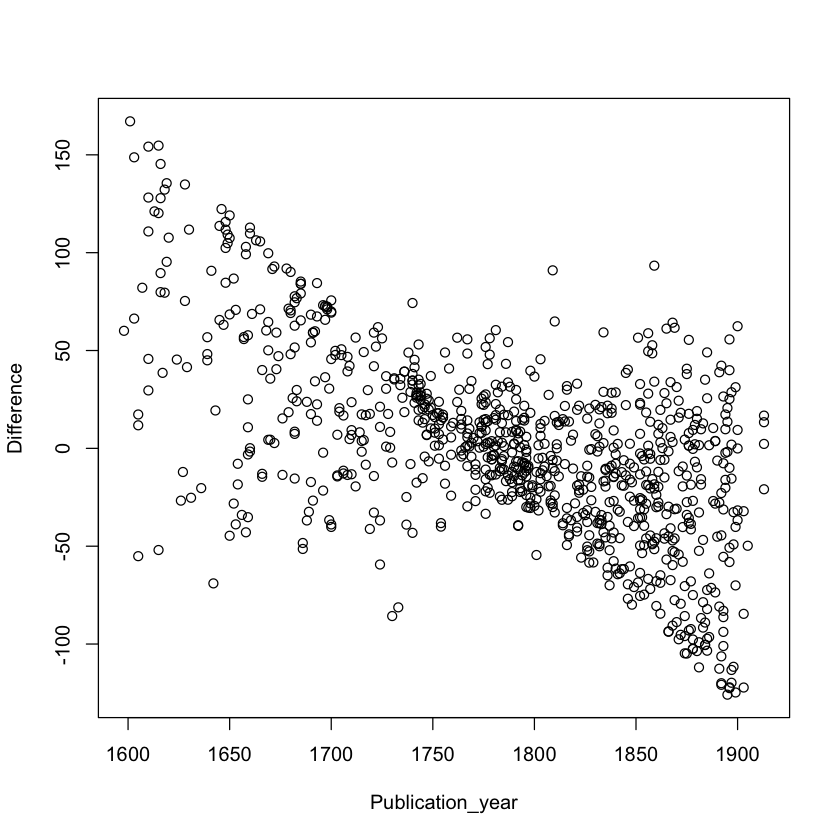

In [9]:
plot(Difference~Publication_year, data=labels_train_reg4)

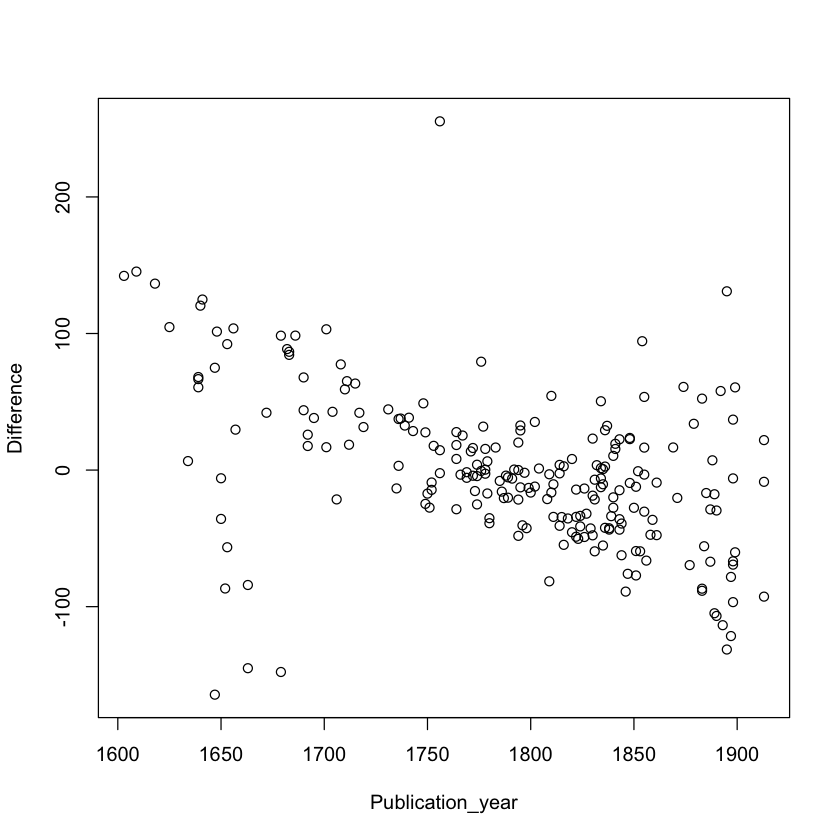

In [10]:
plot(Difference~Publication_year, data=labels_val_reg4)

This graph shows that the prediction is more precise in the middle of the time range than in the outer parts. This indicates that polynomial regression might provide a better fit than simple linear regression.

In [11]:
summary(train_reg4)

       X            feature           weight             YEAR     
 Min.   :  0.0    '.'   :   900   Min.   :  -0.34   Min.   :   0  
 1st Qu.: 51.0    'den' :   900   1st Qu.:  -0.03   1st Qu.:1762  
 Median :103.0    'der' :   900   Median :   0.01   Median :1786  
 Mean   :103.5    'die' :   900   Mean   :   8.20   Mean   :1787  
 3rd Qu.:156.0    'in'  :   900   3rd Qu.:   0.06   3rd Qu.:1826  
 Max.   :215.0    'mit' :   900   Max.   :1769.72   Max.   :1962  
                 (Other):178837   NA's   :184021                  
  weight_value         instance    
 Min.   :-7779256   Min.   :  0.0  
 1st Qu.:     -45   1st Qu.:226.0  
 Median :       1   Median :451.0  
 Mean   :    1868   Mean   :450.1  
 3rd Qu.:      81   3rd Qu.:674.0  
 Max.   :14335279   Max.   :898.0  
 NA's   :216        NA's   :216    

In [40]:
train_reg4_highest_features <- top_n(train_reg4, 190, train_reg4$weight_value)
    
    

In [34]:
head(train_reg4_highest_features, 5)

X,feature,weight,YEAR,weight_value,instance
1,'dem',NA,1815,769801.6,13
9,',NA,1729,8942297.8,38
1,'dem',NA,1729,3432639.2,38
4,'die',NA,1729,2449262.8,38
11,'nicht',NA,1729,722258.6,38


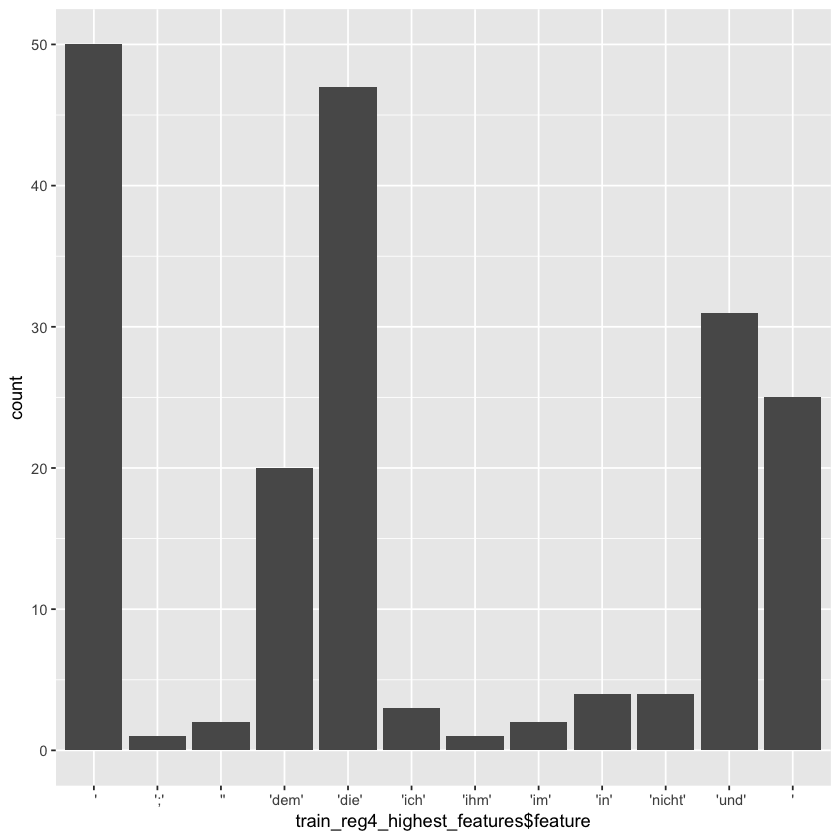

In [35]:
ggplot(train_reg4_highest_features, aes(x=train_reg4_highest_features$feature)) + geom_bar()

In [30]:
val_reg4_highest_features <- top_n(val_reg4,50, val_reg4$weight_value)

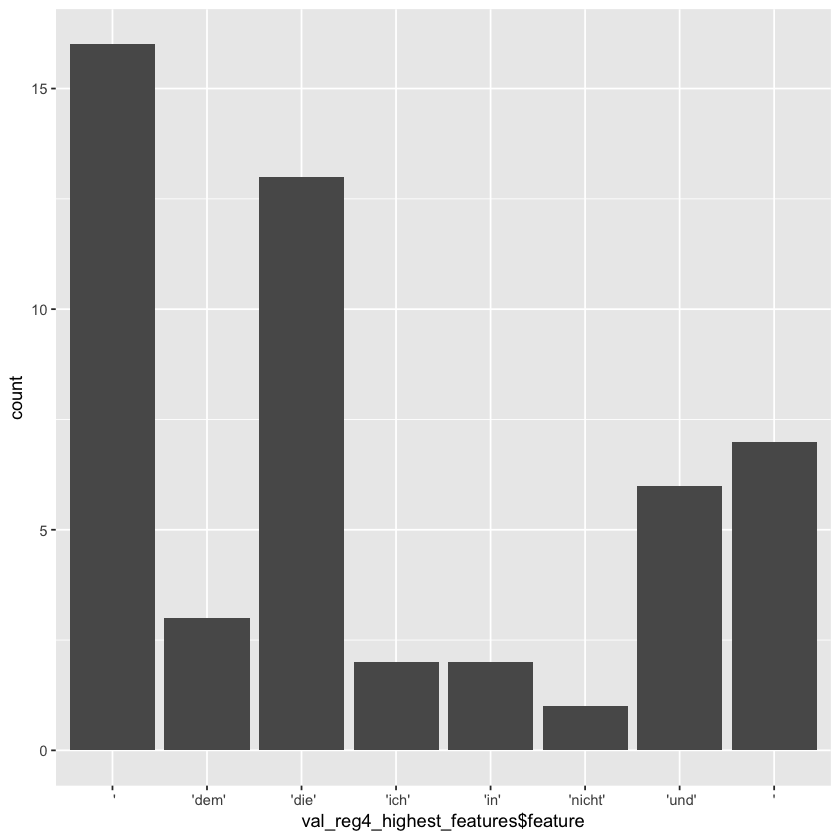

In [31]:
ggplot(val_reg4_highest_features, aes(x=val_reg4_highest_features$feature)) + geom_bar()

I used about 20% of the features that had the most impact on deciding if a text is new or not, and it seems that the words 'dem', 'die', 'ich', 'in', 'nicht', 'und', and ''' had the most impact on the system.

In [41]:
train_reg4_lowest_features <- top_n(train_reg4, -190, train_reg4$weight_value)

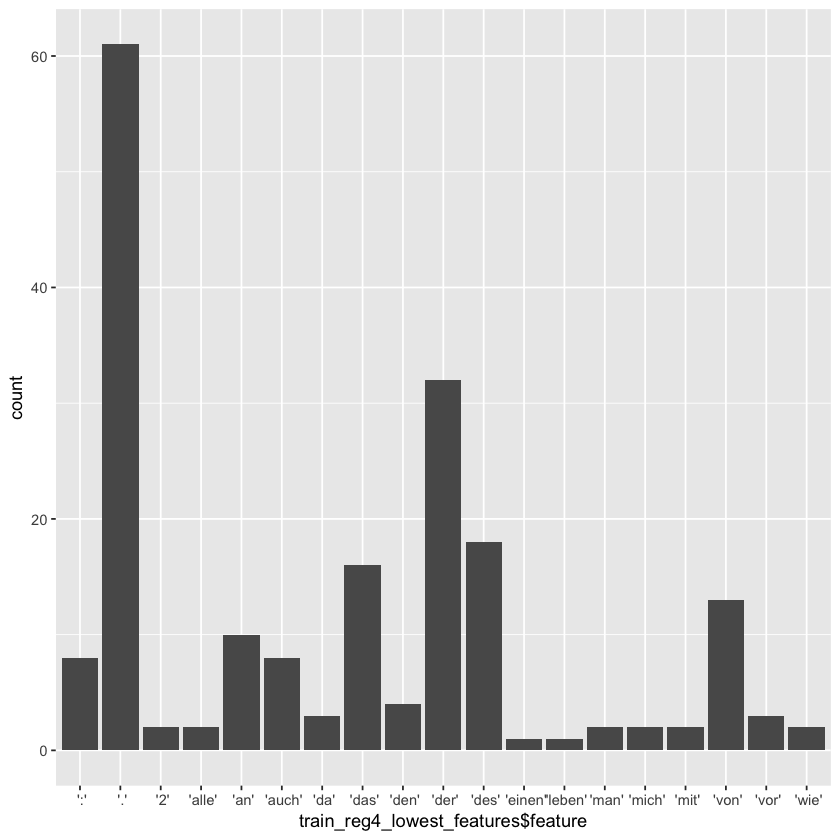

In [42]:
ggplot(train_reg4_lowest_features, aes(x=train_reg4_lowest_features$feature)) + geom_bar()

In [43]:
val_reg4_lowest_features <- top_n(val_reg4,-50, val_reg4$weight_value)

In [45]:
head(val_reg4_lowest_features, 5)

X,feature,weight,YEAR,weight_value,instance
188,'.',NA,1518,-789759.6,2
197,'der',NA,1518,-477614.0,2
213,'.',NA,1780,-3368245.4,4
209,'der',NA,1780,-678251.7,4
215,'des',NA,1780,-438596.4,4


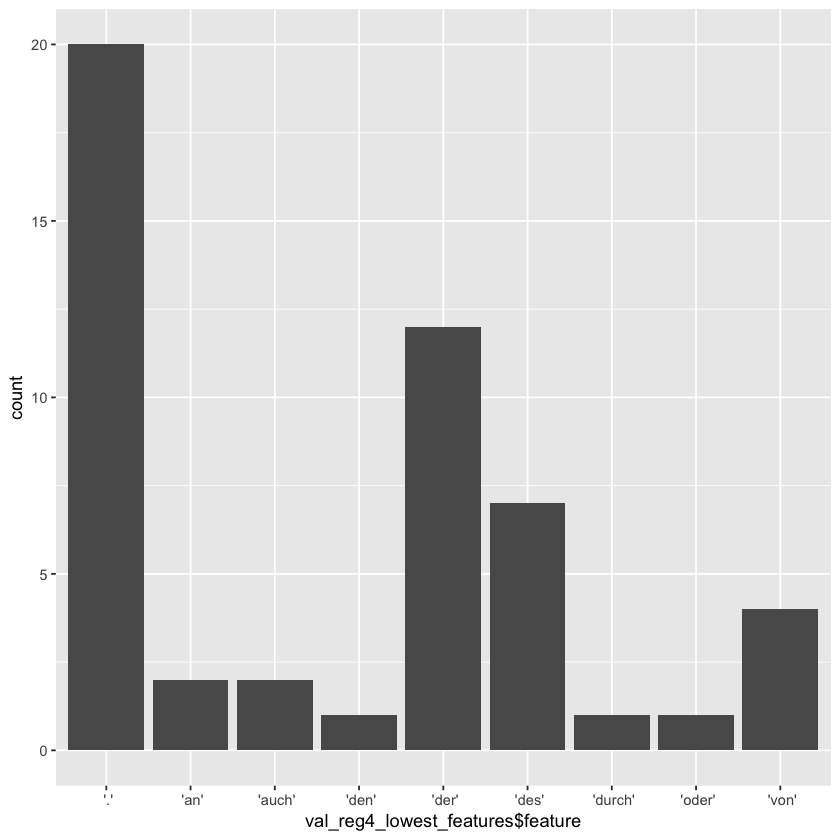

In [44]:
ggplot(val_reg4_lowest_features, aes(x=val_reg4_lowest_features$feature)) + geom_bar()

The features that seem to be a hint for an old text are less consisten than the ones for younger texts. This can be due to the fact that there is a bias towards younger texts in the dataset itself. 

The most consistent features are 'an', 'auch', 'den', 'der', 'des', 'von', and '.'. 

In [73]:
train_reg4_youngest = top_n(train_reg4,43000, train_reg4$YEAR)

train_reg4_youngest = top_n(train_reg4_youngest,190, train_reg4_youngest$weight_value)

In [74]:
head(train_reg4_youngest)

X,feature,weight,YEAR,weight_value,instance
4,'die',NA,1893,420042.1,6
11,',NA,1908,467375.8,16
2,'die',NA,1908,583390.3,16
7,',NA,1869,678160.3,41
3,'die',NA,1869,1005223.0,41
5,'und',NA,1869,388312.6,41


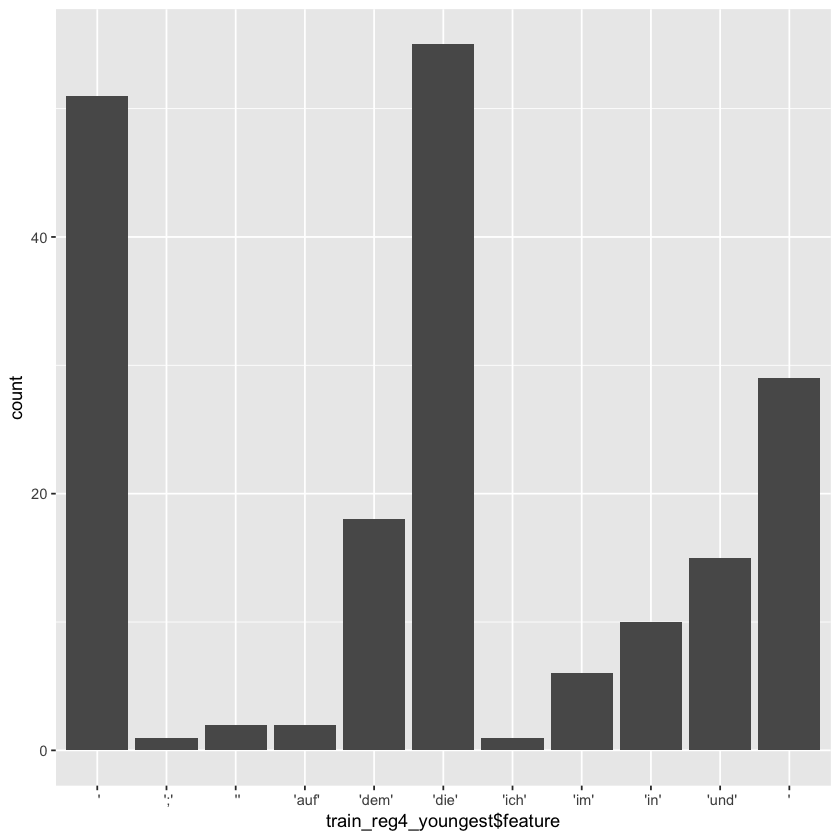

In [75]:
ggplot(train_reg4_youngest, aes(x=train_reg4_youngest$feature)) + geom_bar()

In [76]:
val_reg4_youngest = top_n(val_reg4,9675, val_reg4$YEAR)

val_reg4_youngest = top_n(val_reg4_youngest, 50, val_reg4_youngest$weight_value)

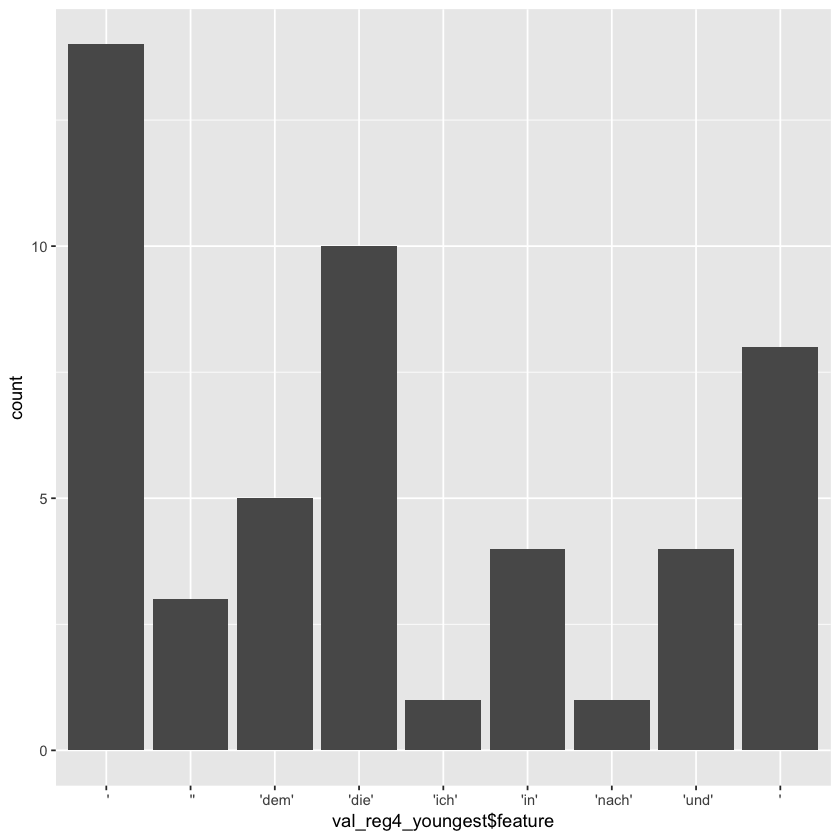

In [77]:
ggplot(val_reg4_youngest, aes(x=val_reg4_youngest$feature)) + geom_bar()